# **Fundamentos de Data Science**
### **Analizando la Rotación de Clientes en Telecomunicaciones**

### Requisitos:

Tu tarea es limpiar y explorar un dataset para los ejecutivos de una empresa de telecomunicaciones que describe tendencias en la rotación de sus clientes.

# **1.Limpieza de datos con Python:**
* Identificar y solucionar cualquier valor duplicado.
* Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
* Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).
* Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.
* Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

# **2.Exploración de datos con Python:**
* Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import plotly.express as px

In [2]:
path = "c:/Users/hp/Downloads/archive (2)/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerID                  7043 non-null   object 
 1   gender                      7043 non-null   object 
 2   SeniorCitizen               7043 non-null   int64  
 3   Partner                     7043 non-null   object 
 4   Dependents                  7043 non-null   object 
 5   tenure                      7043 non-null   int64  
 6   PhoneService                7043 non-null   object 
 7   MultipleLines               7043 non-null   object 
 8   InternetService             7043 non-null   object 
 9   OnlineSecurity              7043 non-null   object 
 10  OnlineBackup                7043 non-null   object 
 11  DeviceProtection            7043 non-null   object 
 12  TechSupport                 7043 non-null   object 
 13  StreamingTV                 7043 

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Limpieza de datos con Python:


## Detección y eliminación de valores duplicados

In [4]:
# Identificacion de valores duplicados
duplicados = df.duplicated()

# Conteo del número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()

Número de registros duplicados: 0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Verificación y ajuste de tipos de datos
Verificacion de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [5]:
df.info()
df.columns = df.columns.str.strip()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerID                  7043 non-null   object 
 1   gender                      7043 non-null   object 
 2   SeniorCitizen               7043 non-null   int64  
 3   Partner                     7043 non-null   object 
 4   Dependents                  7043 non-null   object 
 5   tenure                      7043 non-null   int64  
 6   PhoneService                7043 non-null   object 
 7   MultipleLines               7043 non-null   object 
 8   InternetService             7043 non-null   object 
 9   OnlineSecurity              7043 non-null   object 
 10  OnlineBackup                7043 non-null   object 
 11  DeviceProtection            7043 non-null   object 
 12  TechSupport                 7043 non-null   object 
 13  StreamingTV                 7043 

In [6]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [7]:
# Conversion de "Total Charges" a tipo de dato numerico
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

## Consistencia en valores categóricos

In [8]:
df.gender.unique()

array(['Female ', 'Male   '], dtype=object)

In [9]:
df.Partner.unique()
df.Dependents.unique()
df.PhoneService.unique()
df.PaperlessBilling.unique()
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df.MultipleLines.unique()

array(['No phone service ', 'No               ', 'Yes              '],
      dtype=object)

In [11]:
df.PaymentMethod.unique()

array(['Electronic check          ', 'Mailed check              ',
       'Bank transfer (automatic) ', 'Credit card (automatic)   '],
      dtype=object)

In [12]:
df.InternetService.unique()

array(['DSL             ', 'Fiber optic     ', 'No              '],
      dtype=object)

In [13]:
df.Contract.unique()

array(['Month-to-month ', 'One year       ', 'Two year       '],
      dtype=object)

In [14]:
df.OnlineSecurity.unique()
df.OnlineBackup.unique()
df.DeviceProtection.unique()
df.TechSupport.unique()
df.StreamingTV.unique()
df.StreamingMovies.unique()

array(['No                  ', 'Yes                 ',
       'No internet service '], dtype=object)

## Identificacion de valores faltantes

In [15]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
customerID,7032,0,0.0
gender,7032,0,0.0
SeniorCitizen,7032,0,0.0
Partner,7032,0,0.0
Dependents,7032,0,0.0
tenure,7032,0,0.0
PhoneService,7032,0,0.0
MultipleLines,7032,0,0.0
InternetService,7032,0,0.0
OnlineSecurity,7032,0,0.0


In [16]:
# Reemplazo de valores faltantes en TotalCharges con cero si la antiguedad del servicio es igual a 0
condition = (df["TotalCharges"].isnull()) & (df["tenure"] == 0)
df.loc[condition, "TotalCharges"] = 0

# Calculo del valor medio de la columna 'TotalCharges'
median_value = df['TotalCharges'].median()

# Rellenado de los valores faltantes en 'TotalCharges' con los valores medios de la columna
df['TotalCharges'] = df['TotalCharges'].fillna(median_value)

print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Detección de datos anómalos

In [17]:
df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

# Exploración de datos con Python

## Visualizaciones exploratorias univariadas

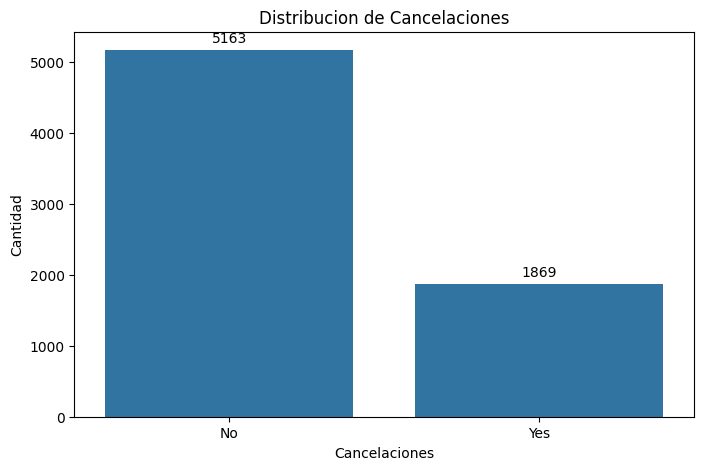

In [18]:
# Clientes que cancelaron el servicio en el ultimo mes se encuentran en la columna "Churn"
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="Churn", data=df)
plt.title("Distribucion de Cancelaciones")
plt.xlabel("Cancelaciones")
plt.ylabel("Cantidad")
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)
plt.show()

La distribución del "Churn" muestra que hay 5174 clientes que se han quedado con el servicio, y 1869 que lo han cancelado.

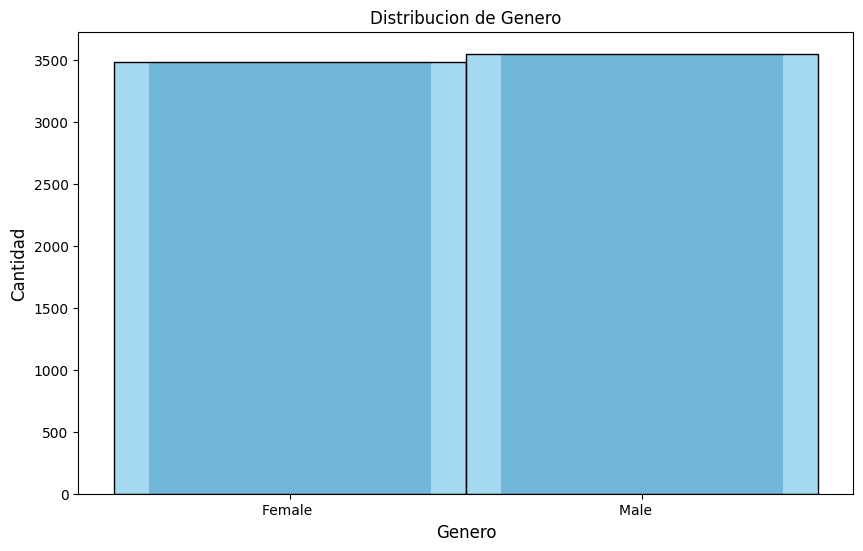

In [19]:
#Cantidad de clientes por genero.
genero = df['gender'].dropna()
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="gender", data=df)
plt.title("Distribucion de Genero", fontsize=12)
plt.xlabel("Genero", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
sns.histplot(genero, bins=30, kde=False, color='skyblue')
plt.show()

Cantidad de clientes por genero.

In [20]:
# Mostrar histograma por monto de facturacion total "TotalCharges"
fig = px.histogram(df, x='TotalCharges', nbins=14, title='Histograma de Facturacion total')
fig.show()

El histograma de facturacion, muestra la cantidad de facturaciones vs el monto de facturacion respectivamente. Por ejemplo de 0 a 500 USD existen 2011 facturaciones realizadas.

## Visualizaciones exploratorias multivariadas

### Monto de facturacion por cada tipo de metodo de pago utilizado por los clientes.

C:\Users\hp\AppData\Local\Temp\ipykernel_19748\2672491897.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




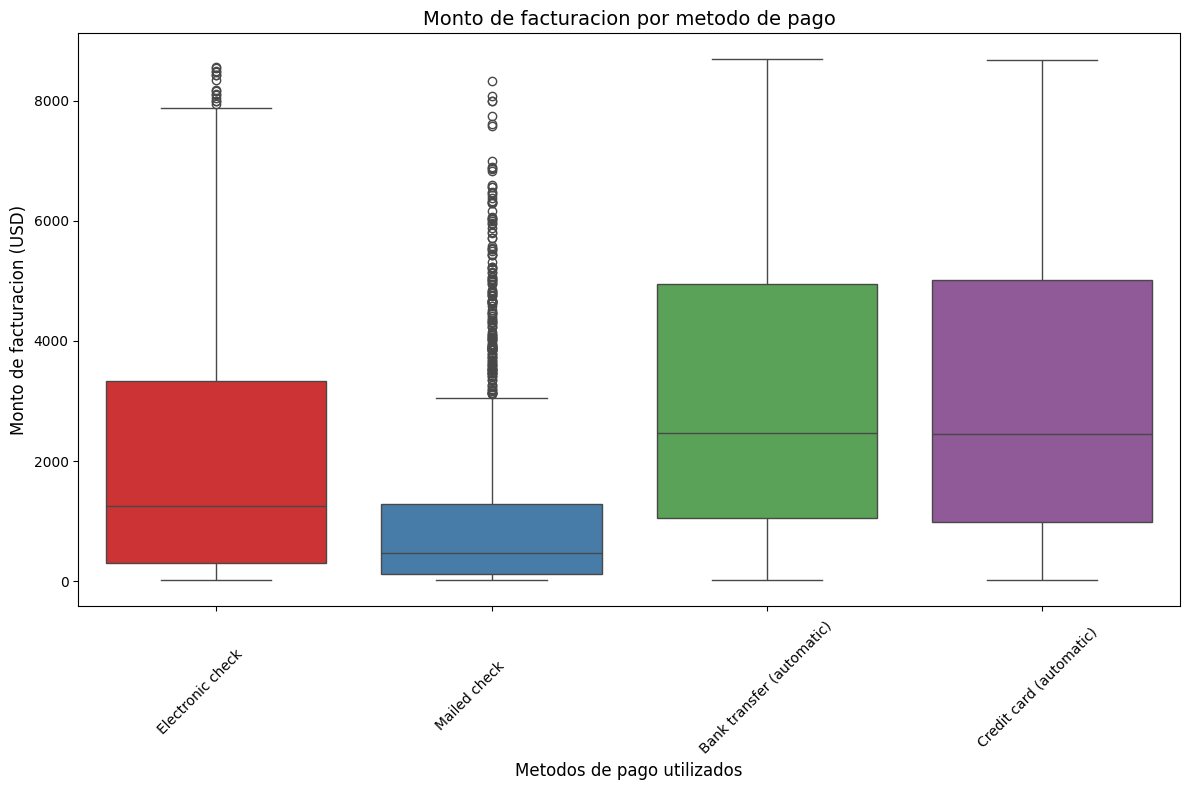

In [21]:
df_monto_facturacion = df[['TotalCharges', 'PaymentMethod']].dropna()
plt.figure(figsize=(12, 8))
sns.boxplot(x='PaymentMethod', y='TotalCharges', data=df_monto_facturacion, palette='Set1')
plt.title('Monto de facturacion por metodo de pago', fontsize=14)
plt.xlabel('Metodos de pago utilizados', fontsize=12)
plt.ylabel('Monto de facturacion (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Diagrama de dispersion entre Antiguedad del servicio en Meses y Monto Facturado por Metodo de pago.

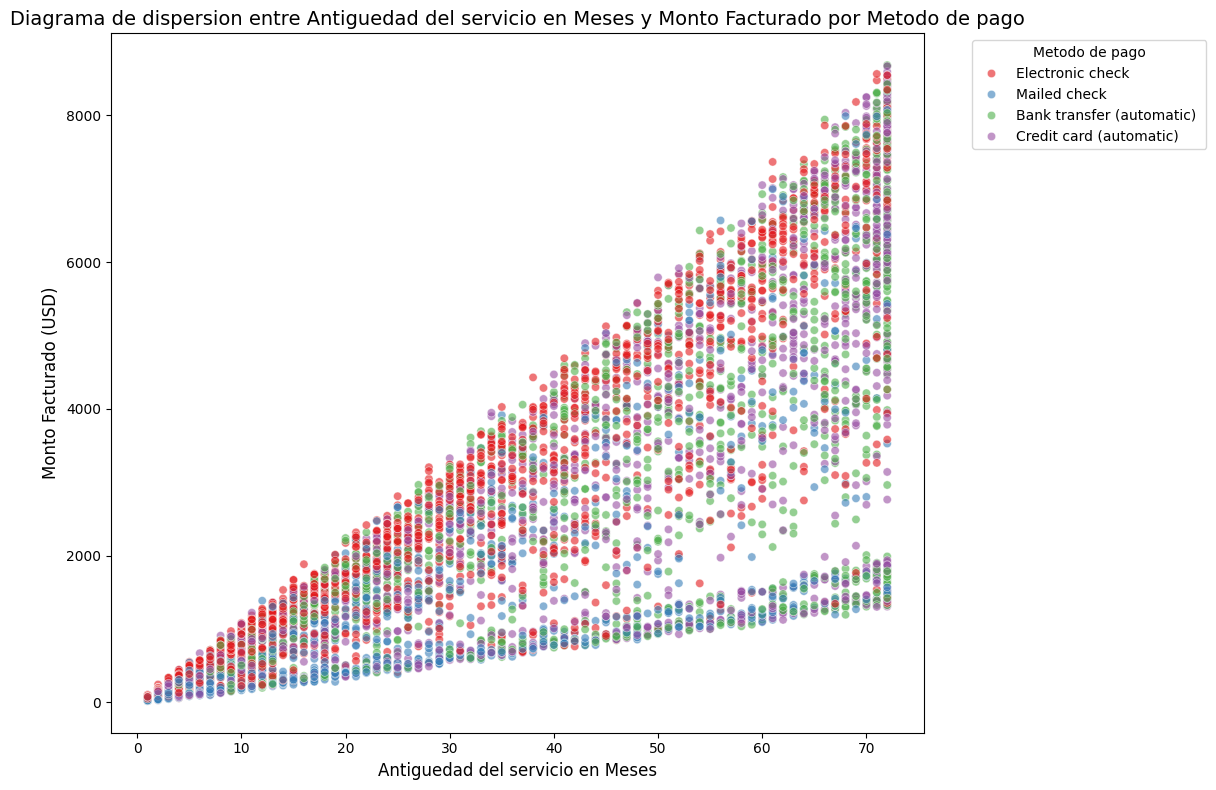

In [22]:
df_antiguedad_facturada = df[['tenure', 'TotalCharges', 'PaymentMethod']].dropna()
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tenure', y='TotalCharges', hue='PaymentMethod', data=df_antiguedad_facturada, alpha=0.6, palette='Set1')
plt.title('Diagrama de dispersion entre Antiguedad del servicio en Meses y Monto Facturado por Metodo de pago', fontsize=14)
plt.xlabel('Antiguedad del servicio en Meses', fontsize=12)
plt.ylabel('Monto Facturado (USD)', fontsize=12)
plt.legend(title='Metodo de pago', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Fuentes de consulta
* ChatGPT.
* Claude AI.
* Github.com.
* Anotaciones de clases del Prof. Iair Linker.